In [2]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd

# LOADING THE DATASET

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/v7_Latest_Data_Science_Salaries.csv'
df = pd.read_csv(dataset_path)


Mounted at /content/drive


In [3]:
#Identifying categorical and numerical columns
categorical_columns = ['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
                       'Salary Currency', 'Company Location', 'Employee Residence', 'Company Size']
numerical_columns = ['Year', 'Salary in USD']  # Salary in USD will be the target variable



In [4]:
# Converting categorical columns into numerical values using one-hot encoding
# Assuming 'df' is the DataFrame loaded in the previous cell
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True) # Changed 'data' to 'df'



In [5]:
# Checking for missing values (if any) and handling them
missing_values = data_encoded.isnull().sum()



In [6]:
# Displaying the first few rows of the encoded dataset to verify the preprocessing
print(data_encoded.head())



   Salary  Salary in USD  Year  Job Title_AI Developer  Job Title_AI Engineer  \
0  138000         138000  2024                   False                  False   
1   86000          86000  2024                   False                  False   
2  179000         179000  2024                   False                  False   
3  112000         112000  2024                   False                  False   
4   92000          92000  2024                   False                  False   

   Job Title_AI Product Manager  Job Title_AI Programmer  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False                    False   
4                         False                    False   

   Job Title_AI Research Engineer  Job Title_AI Scientist  \
0                           False                   False   
1                           Fa

In [7]:
# Step 5: Check for any missing values
print(missing_values)

Salary                              0
Salary in USD                       0
Year                                0
Job Title_AI Developer              0
Job Title_AI Engineer               0
                                   ..
Employee Residence_United States    0
Employee Residence_Uzbekistan       0
Employee Residence_Viet Nam         0
Company Size_Medium                 0
Company Size_Small                  0
Length: 325, dtype: int64


In [8]:
#defining Features (X) and Target (Y)
x = data_encoded.drop('Salary in USD', axis=1)
y = data_encoded['Salary in USD']

In [9]:
from sklearn.model_selection import train_test_split

#splitting the data in training and testing sets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training test shape: {x_train.shape}, {y_train.shape}")
print(f"Testing test shape: {x_test.shape}, {y_test.shape}")

Training test shape: (4588, 324), (4588,)
Testing test shape: (1148, 324), (1148,)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform (x_test)


In [11]:
# Model Building and trainig:

# Building Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute error: {mae}")
print(f"Root mean square error: {rmse}")
print(f"R-squared:{r2}")


Mean Absolute error: 1752.635888501742
Root mean square error: 22707.890951843947
R-squared:0.8876199180259039


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
# Building Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)


print(f"Random Forest - Mean Absolute error: {mae_rf}")
print(f"Random Forest - Root mean square error: {rmse_rf}")
print(f"Random Forest - R-squared:{r2_rf}")

Random Forest - Mean Absolute error: 1797.5156097560978
Random Forest - Root mean square error: 23201.208140886312
Random Forest - R-squared:0.8826840815494272


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
!pip install xgboost

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgboost_model.fit(x_train, y_train)

y_pred_xgb = xgboost_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute error: {mae_xgb}")
print(f"XGBoost - Root mean square error: {rmse_xgb}")
print(f"XGBoost - R-squared:{r2_xgb}")

XGBoost - Mean Absolute error: 1346.6874030242814
XGBoost - Root mean square error: 6931.27808860989
XGBoost - R-squared:0.9895296096801758


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
y_train_pred_xgb = xgboost_model.predict(x_train)

train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

#Training Set
print(f"XGBoost - training Mean Absolute Error: {train_mae_xgb}")
print(f"XGBoost - Training Root Mean Squared Error: {train_rmse_xgb}")
print(f"XGBoost - Training R-Squared: {train_r2_xgb}")

#Test Set
print(f"XGBoost - Test Mean Absolute Error: {mae_xgb}")
print(f"XGBoost - Test Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost - Test R-Squared: {r2_xgb}")


XGBoost - training Mean Absolute Error: 796.8791365552801
XGBoost - Training Root Mean Squared Error: 1892.3695358465775
XGBoost - Training R-Squared: 0.9992964863777161
XGBoost - Test Mean Absolute Error: 1346.6874030242814
XGBoost - Test Root Mean Squared Error: 6931.27808860989
XGBoost - Test R-Squared: 0.9895296096801758


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb

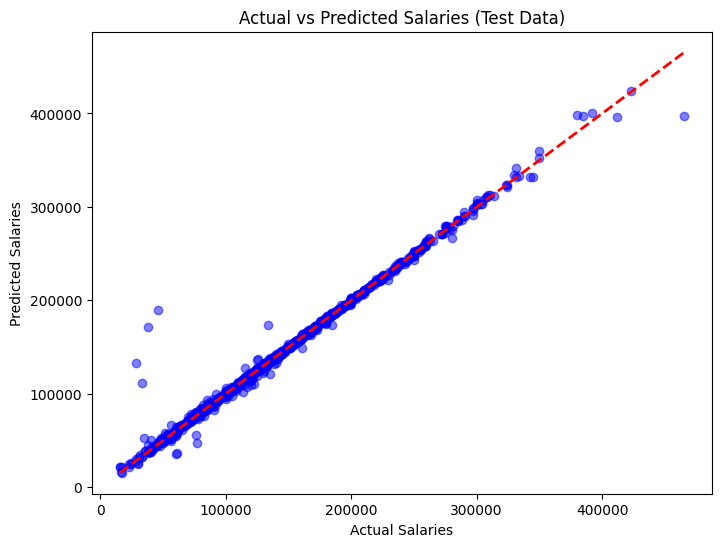

In [35]:
# 1. Scatter Plot: Actual vs Predicted Salaries (Test Data)
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.title('Actual vs Predicted Salaries (Test Data)')
    plt.show()

# Call the functions with the appropriate inputs
plot_actual_vs_predicted(y_test, y_pred_test)


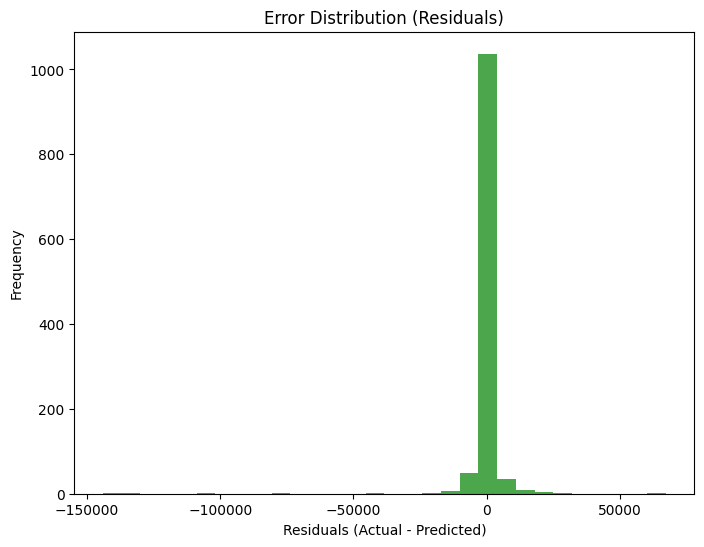

In [36]:
# 2. Histogram: Error Distribution (Residuals)
def plot_error_distribution(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, color='g', alpha=0.7)
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.title('Error Distribution (Residuals)')
    plt.show()

plot_error_distribution(y_test, y_pred_test)

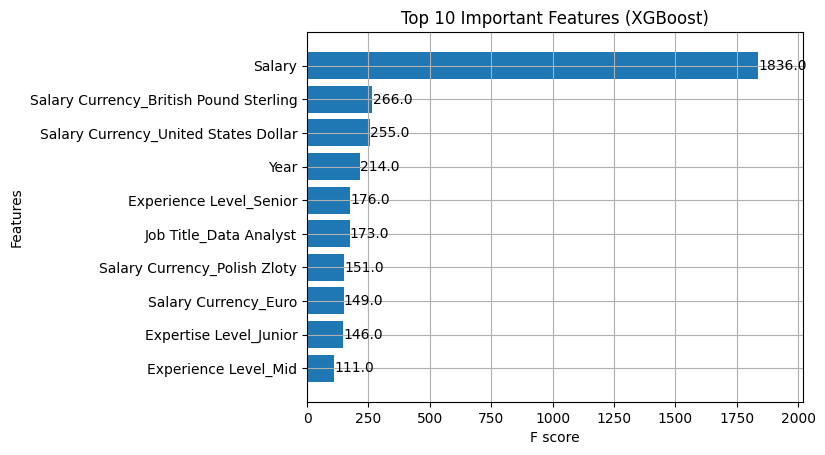

In [37]:
# 3. Feature Importance Plot (Top 10 Features)
def plot_feature_importance(xgboost_model):
    xgb.plot_importance(xgboost_model, max_num_features=10, height=0.8)
    plt.title('Top 10 Important Features (XGBoost)')
    plt.show()

plot_feature_importance(xgboost_model)

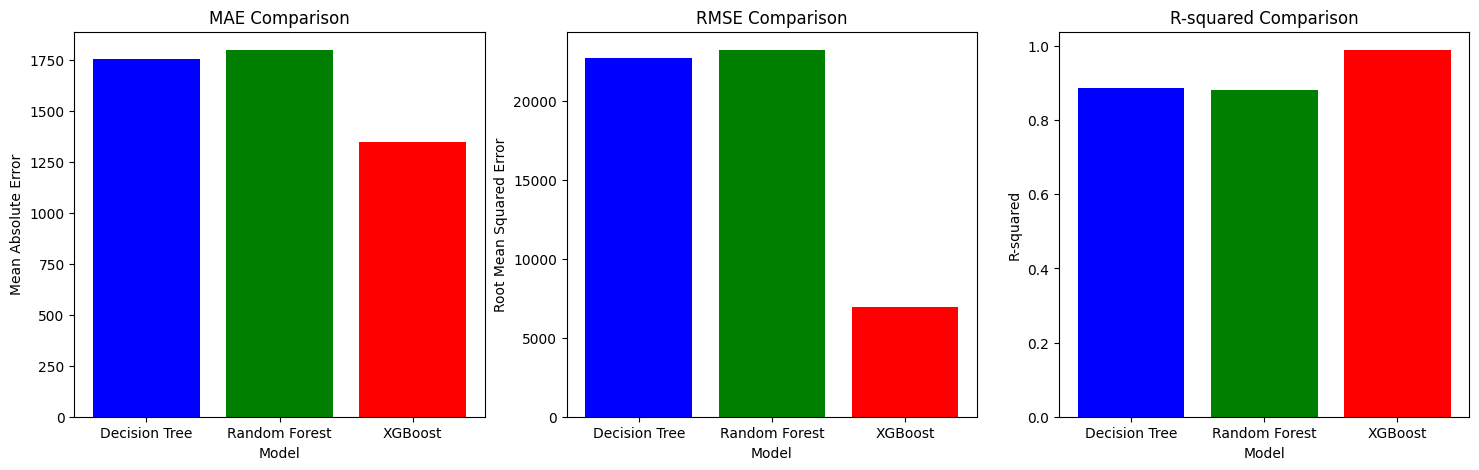

In [38]:
# 4. Bar Chart: Performance Comparison Across Models
def plot_performance_comparison():
    performance_data = {
        'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
        'MAE': [1752.63, 1797.51, 1346.69],
        'RMSE': [22707.89, 23201.20, 6931.27],
        'R-squared': [0.8876, 0.8826, 0.9895]
    }
    performance_df = pd.DataFrame(performance_data)

    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    ax[0].bar(performance_df['Model'], performance_df['MAE'], color=['b', 'g', 'r'])
    ax[0].set_title('MAE Comparison')
    ax[0].set_xlabel('Model')
    ax[0].set_ylabel('Mean Absolute Error')

    ax[1].bar(performance_df['Model'], performance_df['RMSE'], color=['b', 'g', 'r'])
    ax[1].set_title('RMSE Comparison')
    ax[1].set_xlabel('Model')
    ax[1].set_ylabel('Root Mean Squared Error')

    ax[2].bar(performance_df['Model'], performance_df['R-squared'], color=['b', 'g', 'r'])
    ax[2].set_title('R-squared Comparison')
    ax[2].set_xlabel('Model')
    ax[2].set_ylabel('R-squared')

    plt.show()

# Call the functions with the appropriate inputs

plot_performance_comparison()

In [16]:
# Reducing the overfitting by tuning the hyperparameters

xgboost_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_aplpha=0.1,
    reg_lambda=1.0,
    random_state=42

)

In [17]:
import xgboost as xgb
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


xgboost_model =xgb.XGBRegressor(
     n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_aplpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

xgboost_model.fit(x_train, y_train)

with open('xgboost_salary_model.pkl', 'wb') as file:
    pickle.dump(xgboost_model, file)

print("model has been trained and saved successfully!")

def load_model_and_predict(new_data):
  """
  loads the saved XGBoost model and makes salary prediction.
  Parameters:
    new_data (DataFrame): preprocessed data for which predict the salary

  Returns:
    Predicted salary value(s).
    """
  with open('xgboost_salary_model.pkl', 'rb') as file:
      loaded_model = pickle.load(file)

  predicted_salary = loaded_model.predict(new_data)
  return predicted_salary

# Define sample_data outside the function
sample_data = x_test.iloc[:1]  # Take one row from the test set as sample input
predicted_salary = load_model_and_predict(sample_data) #Now call the function with sample_data
print(f"Predicted Salary: ${predicted_salary[0]:.2f}")

# Step 6: Evaluate the Model's Performance on the Test Data (Optional)
y_pred_test = xgboost_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")
print(f"Test R²: {r2}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:49:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "reg_aplpha" } are not used.

  warnings.warn(smsg, UserWarning)


model has been trained and saved successfully!
Predicted Salary: $88912.99
Test MAE: 2032.0389748815876
Test RMSE: 7866.536328421964
Test R²: 0.9865133762359619


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
import xgboost as xgb
import pickle
import pandas as pd

# Step 1: Load the Saved XGBoost Model
with open('xgboost_salary_model.pkl', 'rb') as file:
    xgboost_model = pickle.load(file)

# Step 2: Define a Function to Capture User Input
def get_user_input():
    """
    Collects user input for model prediction and returns it as a DataFrame.
    Make sure the input matches the feature names in the original dataset.
    """
    job_title = input("Enter the job title (e.g., 'Data Scientist'): ").strip()
    employment_type = input("Enter the employment type (e.g., 'Full-time'): ").strip()
    experience_level = input("Enter the experience level (e.g., 'Senior'): ").strip()
    expertise_level = input("Enter the expertise level (e.g., 'Intermediate'): ").strip()
    company_size = input("Enter the company size (e.g., 'Medium'): ").strip()
    company_location = input("Enter the company location (e.g., 'United States'): ").strip()
    year = int(input("Enter the year (e.g., 2024): "))

    # Step 3: Create a DataFrame from User Input (with appropriate column names)
    user_data = pd.DataFrame({
        'Job Title': [job_title],
        'Employment Type': [employment_type],
        'Experience Level': [experience_level],
        'Expertise Level': [expertise_level],
        'Company Size': [company_size],
        'Company Location': [company_location],
        'Year': [year]
    })

    return user_data

# Step 4: Preprocess the User Input to Match Training Data Format
def preprocess_user_input(user_data, full_feature_list):
    """
    Preprocesses user input to match the encoded format used during model training.
    """
    # Apply one-hot encoding to user data
    user_data_encoded = pd.get_dummies(user_data)

    # Ensure all columns from the original training set are present
    # (This avoids missing or extra columns in the prediction input)
    user_data_encoded = user_data_encoded.reindex(columns=full_feature_list, fill_value=0)

    # Reorder columns to match the original feature order
    user_data_encoded = user_data_encoded[full_feature_list]

    return user_data_encoded

# Step 5: Use the Model to Predict Salary
def predict_salary(user_data_encoded):
    """
    Uses the XGBoost model to predict the salary based on user input.
    """
    predicted_salary = xgboost_model.predict(user_data_encoded)
    return predicted_salary[0]

# Step 6: Main Program to Run the Interactive Prediction Model
if __name__ == "__main__":
    # Example: List of all feature columns used during training (replace with actual feature list)
    full_feature_list = x_train.columns  # Ensure this matches your original dataset

    print("Welcome to the Salary Prediction Model!")
    user_data = get_user_input()  # Collect user input

    user_data_encoded = preprocess_user_input(user_data, full_feature_list)  # Preprocess input
    predicted_salary = predict_salary(user_data_encoded)  # Predict salary

    print(f"\nPredicted Salary: ${predicted_salary:.2f}")


Welcome to the Salary Prediction Model!
Enter the job title (e.g., 'Data Scientist'): Data Scientist
Enter the employment type (e.g., 'Full-time'): Full-time
Enter the experience level (e.g., 'Senior'): Senior
Enter the expertise level (e.g., 'Intermediate'): Intermediate
Enter the company size (e.g., 'Medium'): Medium
Enter the company location (e.g., 'United States'): United States
Enter the year (e.g., 2024): 2023

Predicted Salary: $21712.38
